# **Numerical Solutions of Ordinary Differential Equations**

***

## **(1) Import Libraries ⬇️**

In [110]:
# Data manipulation and visualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set matplotlib inline
%matplotlib inline

# Set default figure size
plt.rcParams['figure.figsize'] = (6, 4)

# Define custom color palette
palette = sns.color_palette("viridis", 12)

## **(2) Solving Ordinary Differential Equations**

#### **First Equation**

In [111]:
# Define the ODEs and their derivatives
def f(x, y):
    return 22 * np.exp(x / 5) - 5 * x - 25

def df(x, y):
    return (22 / 5) * np.exp(x / 5) - 5

# Actual solution
def F(x):
    return 110 * np.exp(x / 5) - (5 / 2) * pow(x, 2)- 25 * x - 113

**Solución -->**

1. **Ecuación diferencial:**

   $$
   \frac{dy}{dx} = 22e^{(x/5)} - 5x - 25 
   $$

2. **Integración en ambos lados:**

   $$
   \int dy = \int \left( 22e^{(x/5)} - 5x - 25 \right) dx 
   $$

3. **Simplificación:**

   $$
   y = \int 22e^{(x/5)} \, dx - \int 5x \, dx - \int 25 \, dx
   $$

4. **Resultados de las integraciones:**

   - Para la primera integral:

     $$
     \int 22e^{(x/5)} \, dx = 110e^{(x/5)}
     $$

   - Para la segunda integral:

     $$
     \int 5x \, dx = \frac{5x^2}{2}
     $$

   - Para la tercera integral:

     $$
     \int 25 \, dx = 25x
     $$

5. **Combinando todas las integrales, se obtiene:**

   $$
   y = 110e^{(x/5)} - \frac{5x^2}{2} - 25x + C
   $$

Donde \( C \) es la constante de integración.

#### **Second Equation**

In [112]:
# Define the ODEs and their derivatives
def g(x, y):
    return -np.sin(x)

def dg(x, y):
    return -np.cos(x)

# Actual solution
def G(x):
    return np.cos(x)

**Solución -->**

1. **Ecuación diferencial:**
   $$
   \frac{dy}{dt} = -\sin(t)
   $$

2. **Integración en ambos lados:**
   $$
   \int dy = \int -\sin(t) \, dt
   $$

3. **Resultado de la integración:**

   Se obtiene:
   $$
   y = \cos(t) + C
   $$


Donde \( C \) es la constante de integración.

### **(1) Euler's Method**

In [113]:
def euler(f, y0, x0, x_end, h):
    n = int((x_end - x0) / h) + 1  # Calculate the number of steps
    x_values = []  # List to store x values
    y_values = []  # List to store y values

    for i in range(n):
        x_values.append(x0)  # Append current x value
        y_values.append(y0)  # Append current y value
        y0 = y0 + h * f(x=x0, y=y0)  # Update y using Euler's formula
        x0 = x0 + h  # Increment x

    return x_values, y_values  # Return the results

### **(2) Heun's Method**

In [114]:
def heun(f, y0, x0, x_end, h):
    n = int((x_end - x0) / h) + 1  # Calculate the number of steps
    x_values = []  # List to store x values
    y_values = []  # List to store y values

    for i in range(n):
        x_values.append(x0)  # Append current x value
        y_values.append(y0)  # Append current y value

        # Predictor step using Euler's method
        y_predict = y0 + h * f(x=x0, y=y0)
        y0 = y0 + 0.5 * h * (f(x=x0, y=y0) + f(x=x0 + h, y=y_predict))
        x0 = x0 + h  # Increment x

    return x_values, y_values  # Return the results

### **(3) Taylor's Method**

In [115]:
def taylor(f, df, y0, x0, x_end, h):
    n = int((x_end - x0) / h) + 1  # Calculate the number of steps
    x_values = []  # List to store x values
    y_values = []  # List to store y values

    for _ in range(n):
        x_values.append(x0)  # Append current x value
        y_values.append(y0)  # Append current y value

        # Taylor expansion
        y0 = y0 + h * f(x=x0, y=y0) + 0.5 * pow(h, 2) * df(x=x0, y=y0)
        x0 = x0 + h # Increment x

    return x_values, y_values  # Return the results

### **(4) Graph Generation**

#### **First Equation**

In [116]:
# Parameters
y0 = -3  # Initial condition
x0 = 0   # Start of the interval
x_end = 5  # End of the interval
h = 0.1  # Step size

# Solve using different methods
x_euler, y_euler = euler(f, y0, x0, x_end, h)
x_heun, y_heun = heun(f, y0, x0, x_end, h)
x_taylor, y_taylor = taylor(f, df, y0, x0, x_end, h)

# Actual Solution of ODE
# Calculate the number of samples based on the step size
num_samples = int((x_end - x0) / h) + 1
# Create an array of x values
x = np.linspace(x0, x_end, num_samples)

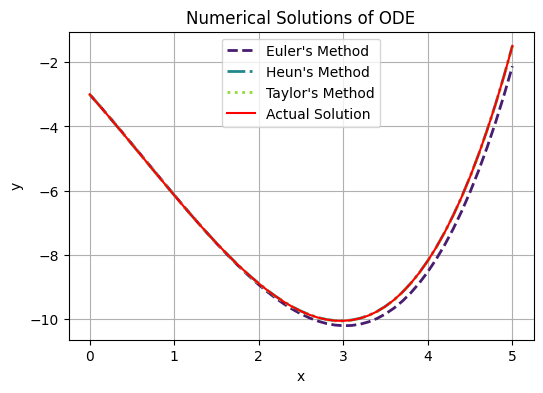

In [117]:
# Plot the results using Seaborn
plt.plot(x_euler, y_euler, label='Euler\'s Method', linestyle='--', linewidth=2, color=palette[0])
plt.plot(x_heun, y_heun, label='Heun\'s Method', linestyle='-.', linewidth=2, color=palette[5])
plt.plot(x_taylor, y_taylor, label='Taylor\'s Method', linestyle=':', linewidth=2, color=palette[10])
plt.plot(x, F(x), label='Actual Solution', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Numerical Solutions of ODE')
plt.legend()
plt.grid()
plt.show()

#### **Second Equation**

In [118]:
# Parameters
y0 = 1          # Initial condition
x0 = 0          # Start of the interval
x_end = 6 * np.pi  # End of the interval
h = 0.1         # Step size

# Solve using different methods
x_euler, y_euler = euler(g, y0, x0, x_end, h)
x_heun, y_heun = heun(g, y0, x0, x_end, h)
x_taylor, y_taylor = taylor(g, dg, y0, x0, x_end, h)

# Actual Solution of ODE
# Calculate the number of samples based on the step size
num_samples = int((x_end - x0) / h) + 1
# Create an array of x values
x = np.linspace(x0, x_end, num_samples)

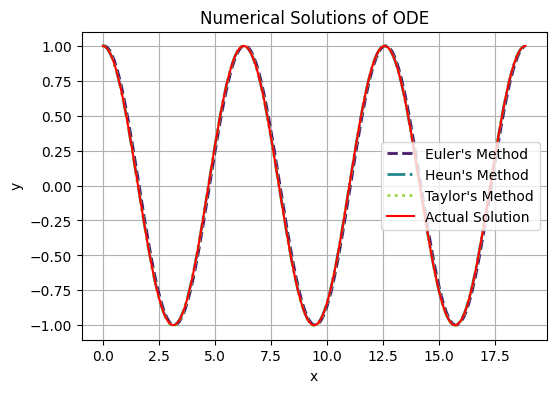

In [119]:
# Plot the results using Seaborn
plt.plot(x_euler, y_euler, label='Euler\'s Method', linestyle='--', linewidth=2, color=palette[0])
plt.plot(x_heun, y_heun, label='Heun\'s Method', linestyle='-.', linewidth=2, color=palette[5])
plt.plot(x_taylor, y_taylor, label='Taylor\'s Method', linestyle=':', linewidth=2, color=palette[10])
plt.plot(x, G(x), label='Actual Solution', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Numerical Solutions of ODE')
plt.legend()
plt.grid()
plt.show()

### **(6) Vector Fields**

#### **First Equation**

#### **Second Equation**

### **(5) References**

**Heun's Method**
> - https://en.wikipedia.org/wiki/Heun%27s_method
> - https://primer-computational-mathematics.github.io/book/c_mathematics/numerical_methods/4_Heuns_method.html
> - https://vcfw.org/pdf/Department/Physics/Python-code-ODE.pdf

**Euler's Method**
> - https://math.stackexchange.com/questions/3236606/second-order-taylor-method-for-solving-ode
> - https://www.geeksforgeeks.org/euler-method-solving-differential-equation/